In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Mô phỏng chuyển động Brown

Một chuyển động Brown tiêu chuẩn, hoặc một quá trình Wiener tiêu chuẩn trên [0,T] là một biến ngẫu nhiên W(t) liên tục theo t trên [9,T] và thỏa mãn ba điều kiện:
- $W(0)=0$
- Với $0\le s\le t\le T$ số gia $W(t)-W(s)$ là biến ngẫu nhiên có phân phối chuẩn với kỳ vọng 0 và phương sai $t-s$
- Với $0\le s\le t\le T$ các số gia $W(t)-W(s)$ và $W(v)-W(u)$ là các biến ngẫu nhiên độc lập

Các phương pháp mô phon

In [2]:
T=1
N=500
dt=T/N
dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

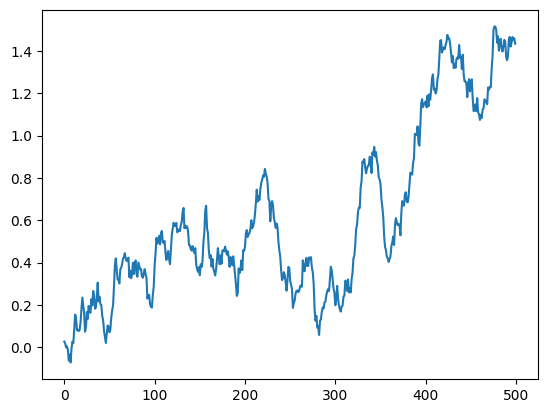

In [3]:
plt.plot(W)
plt.show()

In [4]:
T=1
N=500
M=10000
dt=T/N
t=np.arange(0,1,dt)
dW = np.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)
U=np.exp(t+0.5*W)
Umean = np.mean(U,axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


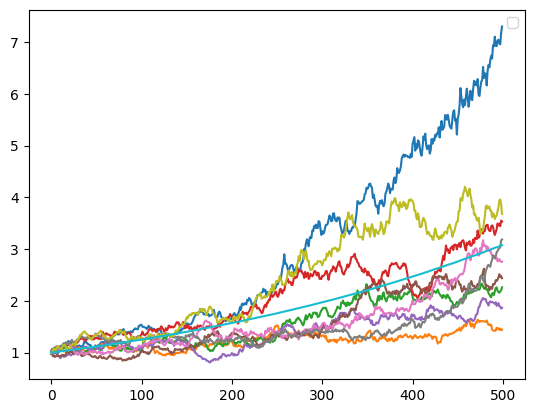

In [5]:
plt.plot(U[:9].T)
plt.plot(Umean)
plt.legend()
plt.show()

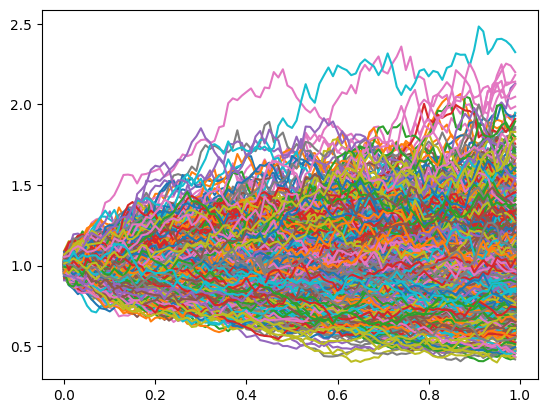

In [6]:
T=1
N=100
M=1000
dt=T/N
dW = np.sqrt(dt)*np.random.randn(M,N)
mu=0
sigma=0.3
Szero=1
Spath=Szero*np.cumprod(np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*np.random.randn(M,N)),axis=1)
plt.plot(np.arange(0,1,dt),Spath.T)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27520\1067242031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(Spath.T).iloc[-1,:])


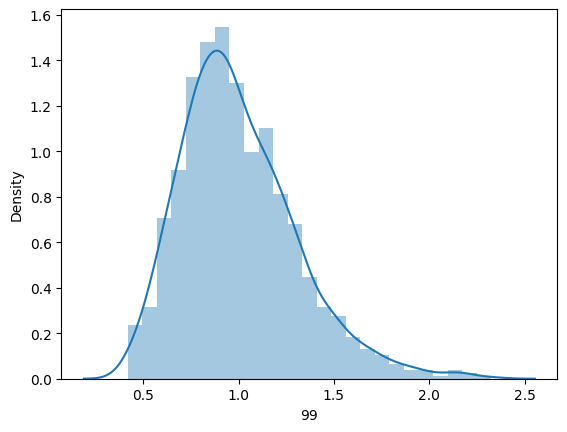

In [7]:
sns.distplot(pd.DataFrame(Spath.T).iloc[-1,:])
plt.show()

In [8]:
import math
def bsf(S,t,E,r,sigma,T):
    tau = T-t
    if tau > 0:
        d1 = (np.log(S/E)+(r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
        d2 = d1-sigma*np.sqrt(tau)
        N1 = 0.5*(1+math.erf(d1/np.sqrt(2)))
        N2 = 0.5*(1+math.erf(d2/np.sqrt(2)))
        C = S*N1-E*np.exp(-r*tau)*N2
    else:
        C = max(S-E,0)
    
    return C

print(bsf(S=2,t=0,E=1,r=0.05,sigma=0.25,T=3))


1.1447424505895418
